# Project PCA

In this project, you will classify particles into gamma(signal) or hadrons(background). Given that the features are correlated, you will perform PCA to get a new set of features, and select the features that contain the most information. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

df = pd.read_csv('telescope_data.csv', index_col=0)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


##  1.

- Remove any nulls from the dataset.

In [32]:
df.dropna(inplace=True)

##  2.

- Extract the numerical columns onto a variable named `data_matrix` and the classes to a variable named `classes`

In [33]:
classes = df['class']
data_matrix = df.drop('class', axis=1)
data_matrix.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


##  3.

- Create a correlation matrix of the data matrix and show it as a heatmap.

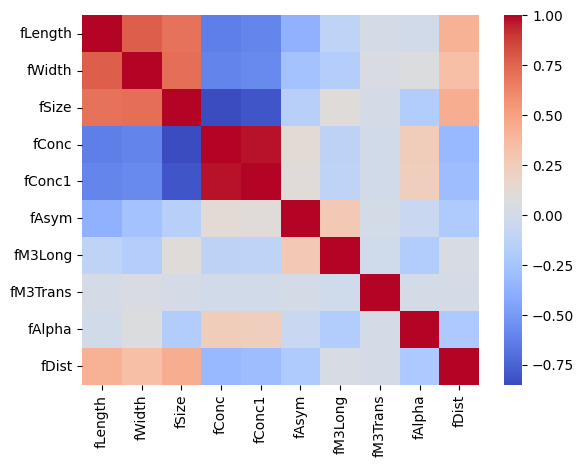

In [34]:
corr_matrix = data_matrix.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

##  4.

- Find the eigenvectors and eigenvalues using the NumPy function `np.linalg.eig`. 
- Here we also order the eigenvalues from greatest to smallest by ordering its indices first, and use these indices to also order the eigenvalues.

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

eigenvalues.shape, eigenvectors.shape

((10,), (10, 10))

##  5.

- Find the proportions of each eigenvalue to the total sum of the eigenvalues. 
- These proportions represent the percentages of information that each eigenvalue’s associated eigenvector contains.

In [36]:
info_prop = eigenvalues / eigenvalues.sum()
info_prop

array([0.42239909, 0.15751879, 0.10118053, 0.09940127, 0.07420194,
       0.06500865, 0.04075386, 0.02203624, 0.01547534, 0.00202429])

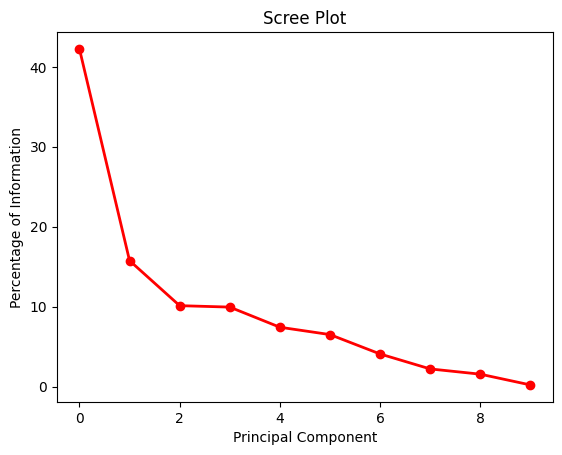

In [37]:
plt.plot(info_prop*100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Information')
plt.show()

##  6.

- Find the cumulative percentages of the ordered eigenvectors.

In [38]:
cum_info_prop = np.cumsum(info_prop)
cum_info_prop

array([0.42239909, 0.57991788, 0.68109841, 0.78049968, 0.85470162,
       0.91971027, 0.96046413, 0.98250037, 0.99797571, 1.        ])

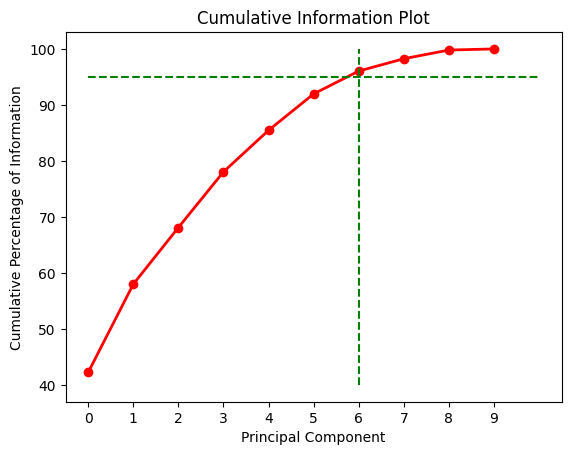

In [39]:
plt.plot(cum_info_prop*100, 'ro-', linewidth=2)
plt.hlines(y=95, xmin=0, xmax=len(cum_info_prop), color='g', linestyles='dashed')
plt.vlines(x=6, ymin=40, ymax=100, color='g', linestyles='dashed')
plt.title('Cumulative Information Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Percentage of Information')
plt.xticks(np.arange(0, len(cum_info_prop), 1))
plt.show()

##  7.

- Recall that PCA uses the standardized matrix, which scales for the mean and standard deviation. 
- Calculate the standardized data matrix.

In [40]:
mean = data_matrix.mean(axis=0)
std = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / std

##  8.

- Using the sklearn module `PCA`, perform PCA by fitting and transforming the standardized data matrix.

In [45]:
pca = PCA()
pca_components = pca.fit_transform(data_matrix_standardized)
pca_components.shape

(19020, 10)

##  9.

- Using the properties of the PCA trained object, `pca`, calculate the eigenvalues from the singular values and extract the eigenvectors.

In [58]:
singular_values = pca.singular_values_
eigenvalues = singular_values**2 

eigenvectors = pca.components_.T

singular_values.shape, eigenvalues.shape, eigenvectors.shape

((10,), (10,), (10, 10))

In [61]:
eigenvalues

array([80336.08291593, 29958.49870176, 19243.52537969, 18905.12749152,
       14112.46685829, 12363.99452158,  7750.97658907,  4191.07299752,
        2943.25455739,   384.99998726])

##  10.

- Using the properties of the pca trained object, extract the variance ratios, which are equivalent to the eigenvalue proportions we calculated earlier.

In [59]:
pca_axes_var_ratio = pca.explained_variance_ratio_
pca_axes_var_perc = pca_axes_var_ratio*100
pca_axes_var_perc

array([42.23990899, 15.75187902, 10.1180532 ,  9.94012697,  7.42019394,
        6.50086467,  4.07538598,  2.20362427,  1.54753381,  0.20242914])

##  11.

- Perform PCA once again but with 2 principal axes. 
- Make sure to fit and transform the standardized data matrix.

In [62]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_matrix_standardized)
pca_components.shape

(19020, 2)

##  12.

- Plot the principal components and have its class as its hue to see if clustering of any kind has occurred.

In [68]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['class'] = classes
pca_df.head()

,PC1,PC2,class
0,-1.016523,0.369247,g
1,-1.679917,0.549211,g
2,5.966085,-1.831268,g
3,-2.556993,0.031628,g
4,1.655809,0.552887,g


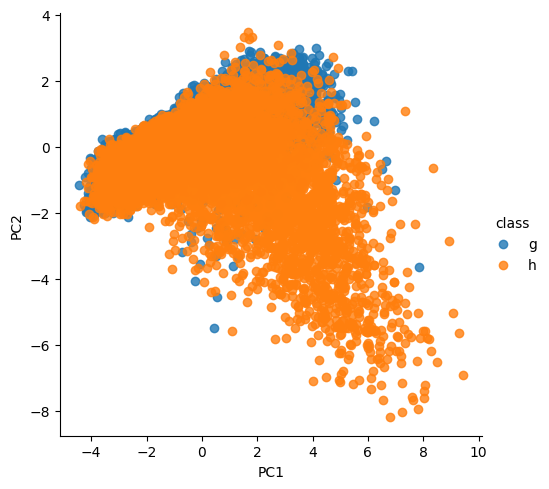

In [67]:
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='class', fit_reg=False)
plt.show()

In [69]:
y = classes.astype('category').cat.codes

##  13.

- Once again, we will perform PCA on 2 components, but we will also use the newly transformed PCA features as input to a support vector classifier! 
- Fit the transformed features onto the classifier and generate a score.

In [70]:
pca_1 = PCA(n_components=2)
X = pca_1.fit_transform(data_matrix_standardized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train)
svc_1.score(X_test, y_test)

0.7417556157400031

##  14.

- Now, fit the classifier with the first two features of the original standardized data matrix and generate a score.
- Looking at the two SVG models, the first model with the PCA features and the second model with the original data features, which model has a higher accuracy score?

In [72]:
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]
X_original.head()

,fLength,fWidth
0,-0.577211,-0.336795
1,-0.510955,-0.570012
2,2.568210,6.205695
3,-0.694749,-0.687241
4,0.516609,0.476371


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

svc_2 = LinearSVC(random_state=0, tol=1e-5)
svc_2.fit(X_train, y_train)
svc_2.score(X_test, y_test)

0.7192926557272582